# Part 1 : Graded

### Setup ###

In [ ]:
# DO NOT EDIT
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

: 

In [ ]:
# DO NOT EDIT
!wget https://probability4datascience.com/data/ch3_data_english.txt

--2022-03-02 16:44:21--  https://probability4datascience.com/data/ch3_data_english.txt
Resolving probability4datascience.com (probability4datascience.com)... 65.8.181.89, 65.8.181.37, 65.8.181.71, ...
Connecting to probability4datascience.com (probability4datascience.com)|65.8.181.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 310 [text/plain]
Saving to: ‘ch3_data_english.txt’

ch3_data_english.tx 100%[===================>]     310  --.-KB/s    in 0s      

2022-03-02 16:44:21 (47.9 MB/s) - ‘ch3_data_english.txt’ saved [310/310]



### [15 Marks] Task 1 : Plot Histogram ####
In this task, you will plot the frequency histogram of the 26 English Alphabets from a given text. For this purpose, you will be implementing the function plot_frequency_histogram which takes filename as the parameter.


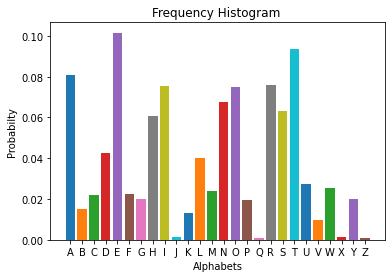

In [ ]:
def plot_frequency_histogram (filename: str) :
  # Load the the text file into an numpy array.
  arr = np.loadtxt(filename,float)
  Sum=sum(arr)
  # alph = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"]
  alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
  # Normalize the input to convert it into probabilities.
  nrml=[]
  for i in range(len(arr)):
    p=arr[i]/Sum
    nrml.insert(i,p)
  # Plot the histogram using plt.bar()

  for i in range(len(arr)):
    plt.bar(alphabet[i],nrml[i])
  # The axes should be labelled correctly and have an appropriate title
  plt.title("Frequency Histogram ")
  plt.ylabel("Frequency")
  plt.xlabel("Alphabets")
 
  

  # Display Plot
  plt.show()
## DON'T CHANGE THIS LINE
plot_frequency_histogram("./ch3_data_english.txt")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### [15 Marks] Task 2  : PMF ###
In this task, you will simulate the throwing of a fair six sided die $n$ times. You are required to experiment with reasonable values of $n$ and for each value you are required to comment how the shape of the each obtained histogram compares with the ideal PMF. 

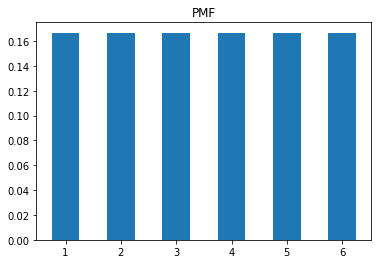

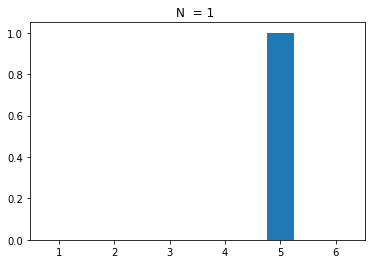

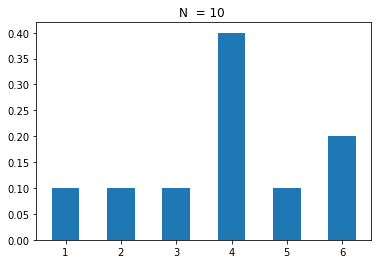

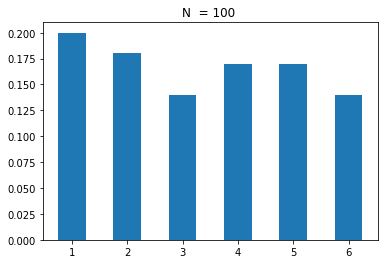

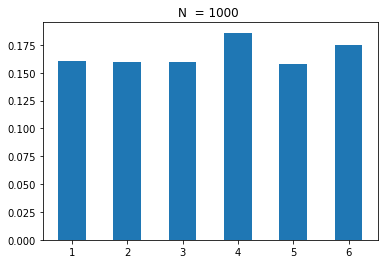

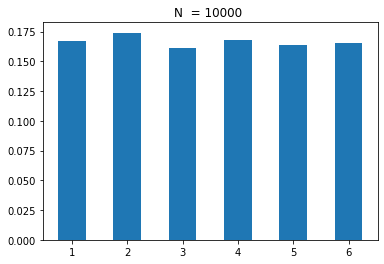

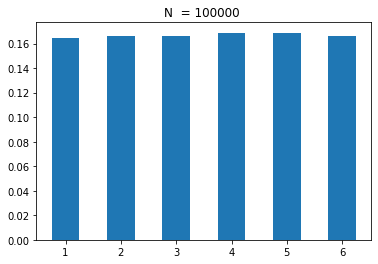

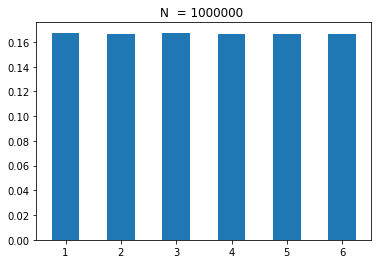

In [ ]:
# DO NOT EDIT
def approximate_PMF (N: list):
  """
  N : Values of n for which the experiment is conducted
  """
  # SET SEED FOR REPRODUCIBILITY
  np.random.seed(0)
  # Plotting the ideal PMF
  fair = np.arange(1,7)
  plt.hist(fair,bins=[1,2,3,4,5,6,7], rwidth = 0.5, density=True,align='left')
  plt.title('PMF')
  plt.show()
  # Simulation
  for i in range(len(N)):
    # Simulate die roll. Size determines the number of times the die is rolled. 
    fair  = np.random.randint(low=1,high=7, size=N[i])
    # Plot Histogram. 
    plt.hist(fair,bins=[1,2,3,4,5,6,7],rwidth = 0.5, density=True, align='left')
    plt.title("N  = %i "%(N[i]))
    plt.show()

approximate_PMF([1, 10, 100, 1000, 10000,100000,1000000 ])

**Write your answer here:** \\
The N we are using here is from 10^0 to 10^6. \\
The 1st histogram deals with just one die roll, hence we get only one instance of with 100% probability. this is no where close to the ideal histogram. \\
The 2nd histogram is for N=10 which shows that 10 die rolls are done and their result is reflected with different frequencies of the varaibles.
We are still very far from the ideal shape. \\
Histogram #3 for 100 is the representation of 100 die rolls, and similar to the previous histograms, its still far from the ideal but we can now visualize the shape to be getting closer. \\
Histogram #4 and #5 are for N= 1000 and N = 10000 and now we are much closer to the ideal shape of histogram. \\
Histogram #6 and #7 are visually exactly like the ideal PMF histogram. \\
We can clearly observe that the higher the N, the closer we are to the ideal Plot. The reason for this is that as we increase the no. of die rolls, our PMF gets better and better at giving us the correct probability. The lesser the No. of rolls, the less accurate result is expected from the PMF. 

### [20 Marks] Task 3 : Expectation , Variance & Moments ### 
In Task 2, you plotted simulated the throwing of a fair die $n$ times. In Task 3, you are required to compute the expectation, variance and moment for each value of $n$ and compare with the actual expectation.  For this purpose, you will be implementing the function compute_expectation_variance_moment. In addition, comment on how these values relate to the value of N.

Hint : Use np.unique to get frequency counts in a numpy array


In [59]:
# Compute Expectation 
def compute_expectation (x: np.array, p: np.array ):
  sum=0
  for i in range(len(x)):
    sum =sum + (x[i]*p[i])
    #sumprb += p[i]
  return sum
  #pass

# Compute Variance
def compute_variance (x: np.array, p: np.array ):
  variance=0
  for i in range(len(x)):
    variance+=(x[i]-compute_expectation(x,p))**2
  return variance
   
# Compute Second Moment
def compute_2nd_moment(x: np.array, p: np.array):
    sum=0
    for i in range(len(x)):
      sum =sum + (((x[i])**2)*p[i])
    return sum

def compute_expectation_variance_moment (N: list):
  for n in N:
    print ("N = {val}".format(val = n ))
    # Simulate Fair Die Roll
    fair  = np.random.randint(low=1,high=7, size=n ) #simulates the die roll giving random no. from 1 to 6 (inclusive)
    x,counts=np.unique(fair,return_counts=True) #will store die rolls in x and dieffernt X frequency in another array "counts"
    p=counts/n
    #print(p)
    # Compute Expectation
    EX = compute_expectation(x,p)
    #EX=0
    # Compute Variance
    Var = compute_variance(x,p)
    #Var=0
    # Compute 2nd Moment
    EX2 = compute_2nd_moment(x,p)
    #EX2 =0
    print ("Expectation : {ex:.2f} ,  Variance : {var:.2f} , 2nd Moment : {moment:.2f}".format(ex=EX,var=Var,moment=EX2))

compute_expectation_variance_moment([1, 5, 8,10,13,15, 20, 30, 45 ])
compute_expectation_variance_moment([1, 10, 100, 1000, 10000,100000,1000000 ])

N = 1
Expectation : 1.00 ,  Variance : 0.00 , 2nd Moment : 1.00
N = 5
Expectation : 3.40 ,  Variance : 14.48 , 2nd Moment : 16.20
N = 8
Expectation : 4.00 ,  Variance : 15.00 , 2nd Moment : 18.50
N = 10
Expectation : 4.10 ,  Variance : 8.84 , 2nd Moment : 19.10
N = 13
Expectation : 4.08 ,  Variance : 19.50 , 2nd Moment : 19.31
N = 15
Expectation : 3.80 ,  Variance : 16.60 , 2nd Moment : 17.53
N = 20
Expectation : 3.65 ,  Variance : 17.63 , 2nd Moment : 15.95
N = 30
Expectation : 3.23 ,  Variance : 17.87 , 2nd Moment : 13.90
N = 45
Expectation : 3.29 ,  Variance : 17.77 , 2nd Moment : 13.29
N = 1
Expectation : 3.00 ,  Variance : 0.00 , 2nd Moment : 9.00
N = 10
Expectation : 3.80 ,  Variance : 10.20 , 2nd Moment : 16.40
N = 100
Expectation : 3.56 ,  Variance : 17.52 , 2nd Moment : 15.94
N = 1000
Expectation : 3.49 ,  Variance : 17.50 , 2nd Moment : 15.13
N = 10000
Expectation : 3.49 ,  Variance : 17.50 , 2nd Moment : 15.14
N = 100000
Expectation : 3.51 ,  Variance : 17.50 , 2nd Moment : 

**Write your answer here:** \\
In this task, we made 3 functions which calculate Expectation, Variance, and 2nd moment. The results of each of these vary with respect to the N. \\
For lower values of $N$ we can see that the expectation is varying highly but it seems to converge to $3.5$ as we approach higher values of $N$. \\
For lower values of $N$ we can observe that the variance increases as $N$ increases but as we approach larger values of $N$, variance converges to $17.5$. As for the 2nd moment, for lower values of $N$ it seems to decrease with the increase in $N$. However, similar to variance, the value of 2nd moment also converges. \\
These result allign with our results from task 2, where we concluded that for smaller values of $N$, the accuracy of the PMF is low but as $N$ increases we approach the ideal values.

### [30 Marks] Task 4 : Common Discrete Random Variables ###
In Task 1, you were introducted to Random Variables. In Task 2, you were introduced to PMF's. In Task 3, you were introduced to computing Expectation, Variance and Moments. In Task 4, you will be introduced to Common DRVs that you have already discussed in class. The aim of Task 4 is to introduce you the simulation of these DRVs in Python. In this task, you are required to vary parameters for each distrubution while keeping others constant and comment on how does this affect the mean , variance and the distrubution.

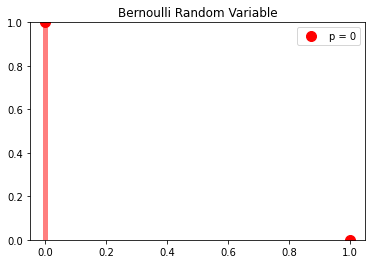

Mean : 0.00 , Variance : 0.00 


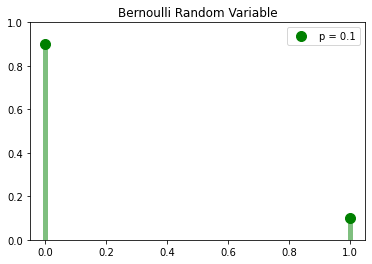

Mean : 0.10 , Variance : 0.09 


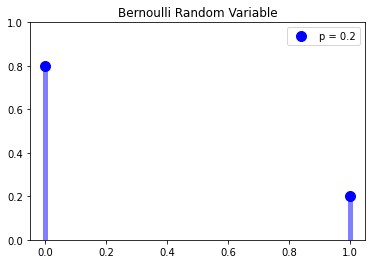

Mean : 0.20 , Variance : 0.16 


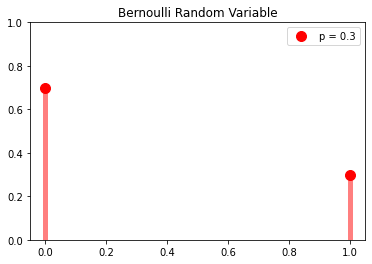

Mean : 0.30 , Variance : 0.21 


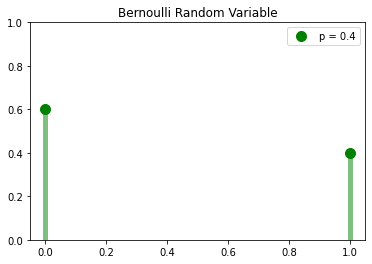

Mean : 0.40 , Variance : 0.24 


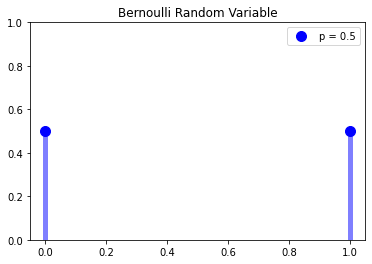

Mean : 0.50 , Variance : 0.25 


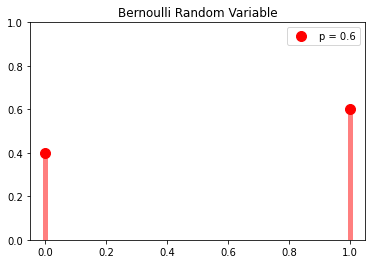

Mean : 0.60 , Variance : 0.24 


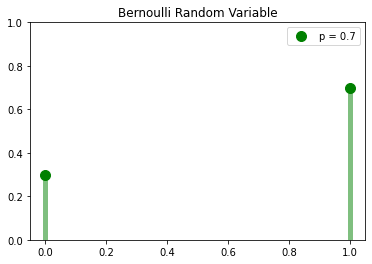

Mean : 0.70 , Variance : 0.21 


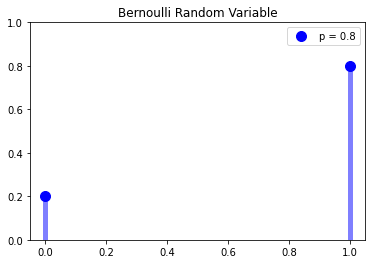

Mean : 0.80 , Variance : 0.16 


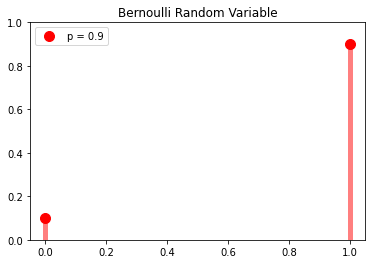

Mean : 0.90 , Variance : 0.09 


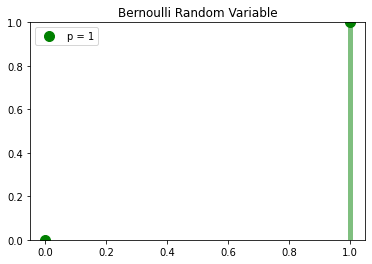

Mean : 1.00 , Variance : 0.00 


In [ ]:
# DO NOT EDIT
# Generate Bernoulli Random Variable Object
def generate_bernoulli_rv(P: list):
  """
  P : Diffrent values for probability of success
  """
  colors = ['r','g','b']
  for i in range(len(P)):
    n = i%3
    p = P[i]
    # p is the probability of a single success.
    rv = stats.bernoulli(p) # Create Bernoulli Random Variable
    mean, var = rv.stats(moments='mv') # Compute Mean and Variance
    x = np.arange(2)
    f = rv.pmf(x)
    # Plot PMF
    # ms: size of o
    plt.plot(x, f, colors[n]+'o', ms=10);
    # alpha: transparency of the line
    # lw: line width
    # Plot VLINES
    plt.vlines(x, 0, f, colors=colors[n], lw=5, alpha=0.5)
    plt.ylim (0,1)
    plt.legend(labels = ["p = {v}".format(v=p)])
    plt.title("Bernoulli Random Variable")
    plt.show()
    print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean,v=var))

# generate_bernoulli_rv([0.1,0.5,0.9])
generate_bernoulli_rv([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

**Write your answer (Bernoulli RV)** \\
The mean increases as the probability increases whereas variance projects a bell curve, which peaks at half (0.5) probability and then goes on a downward trajectory. \\
As for the distribution, it is uneven at low and high probabilities where the major part is towards 0 for low probabilities (< 0.5) and the major part is towards 1 for high probabilities (> 0.5). The distribution levels out at half (0.5) probability, where it is equal at both 0 and 1.

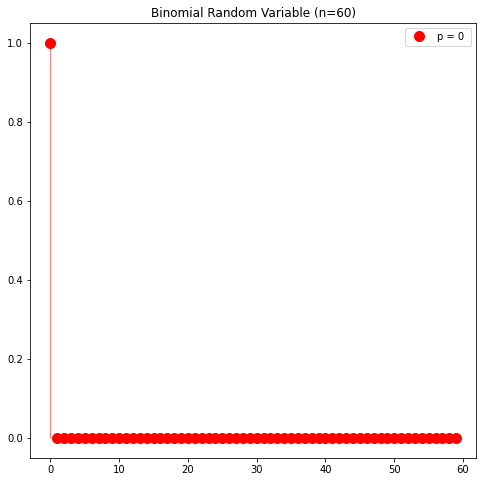

Mean : 0.00 , Variance : 0.00 


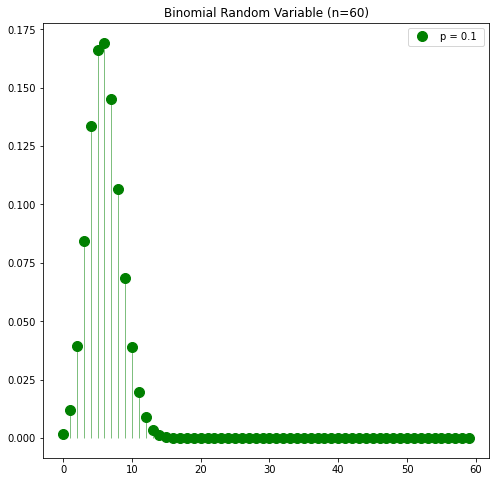

Mean : 6.00 , Variance : 5.40 


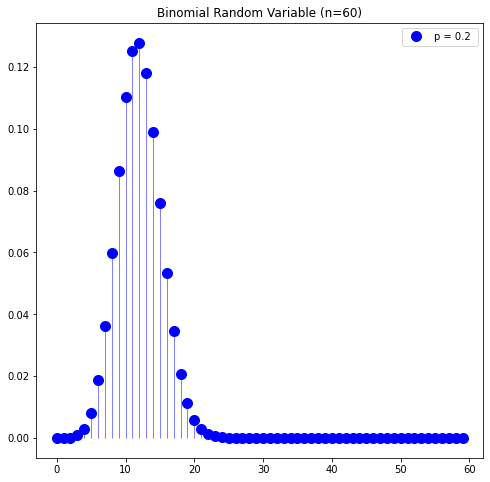

Mean : 12.00 , Variance : 9.60 


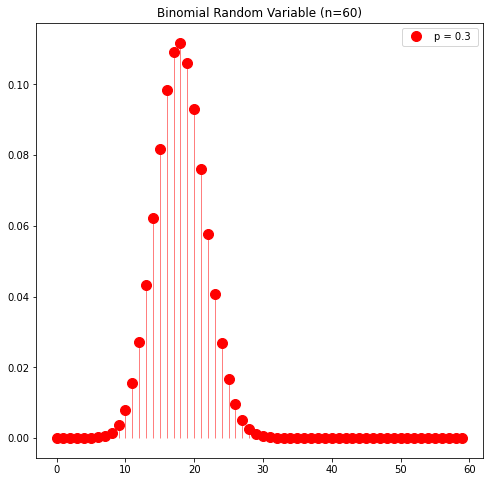

Mean : 18.00 , Variance : 12.60 


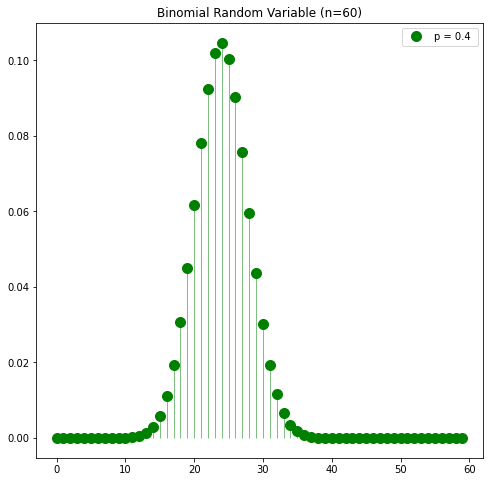

Mean : 24.00 , Variance : 14.40 


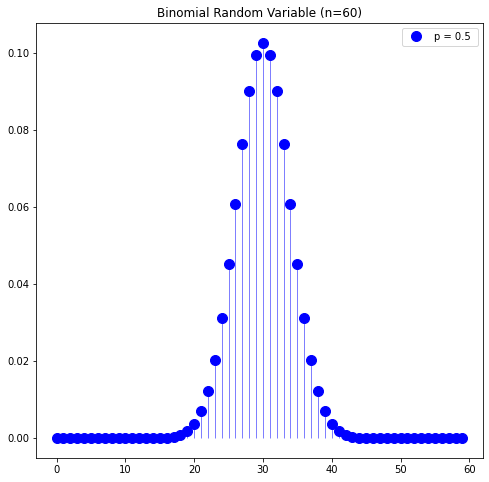

Mean : 30.00 , Variance : 15.00 


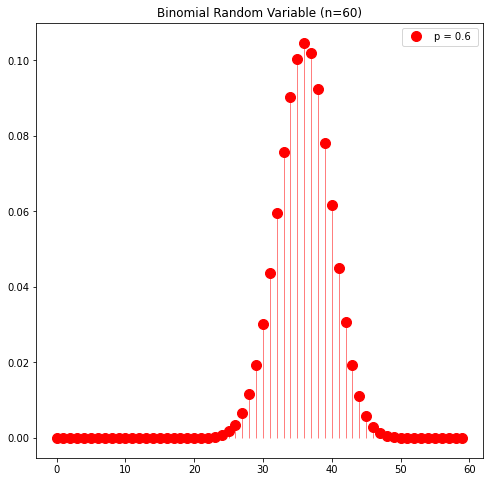

Mean : 36.00 , Variance : 14.40 


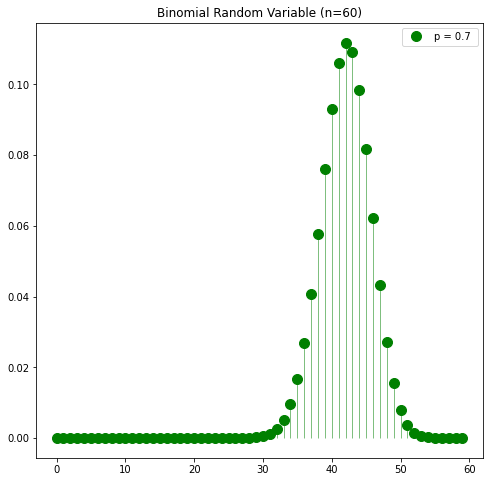

Mean : 42.00 , Variance : 12.60 


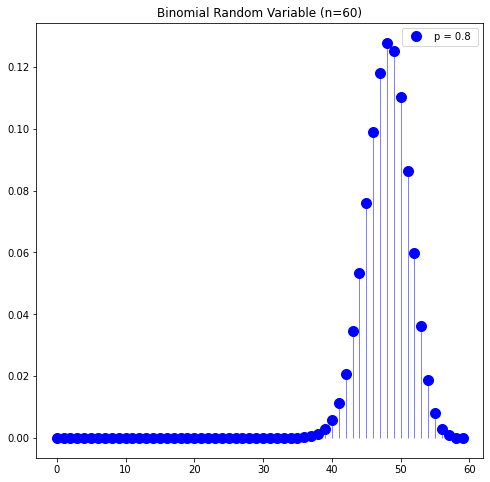

Mean : 48.00 , Variance : 9.60 


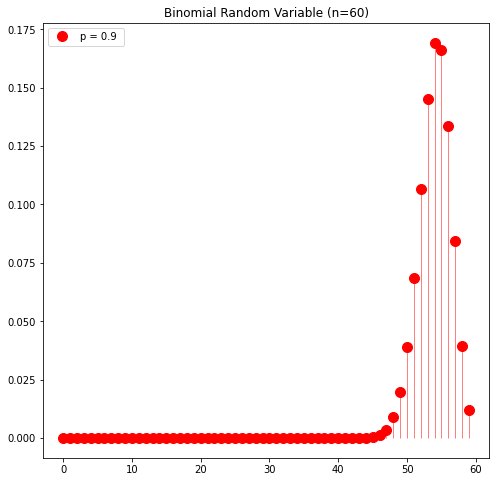

Mean : 54.00 , Variance : 5.40 


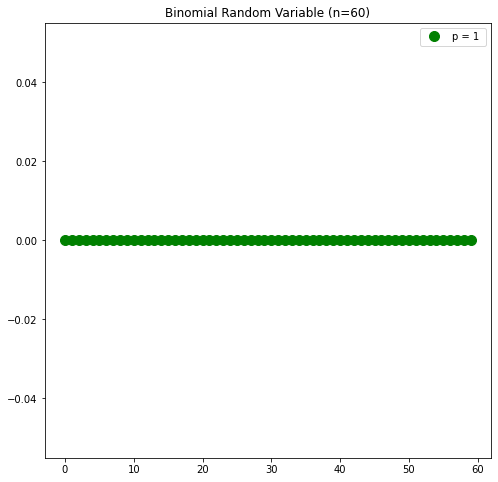

Mean : 60.00 , Variance : 0.00 


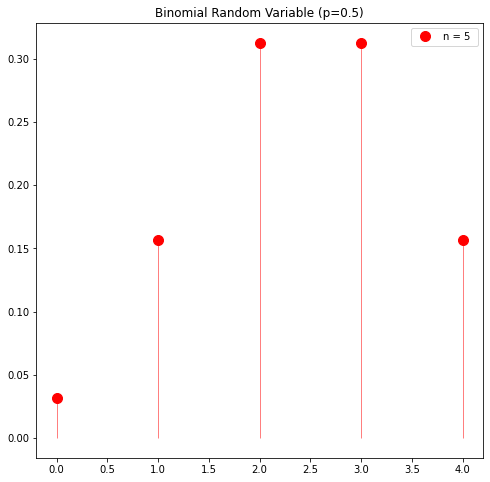

Mean : 2.50 , Variance : 1.25 


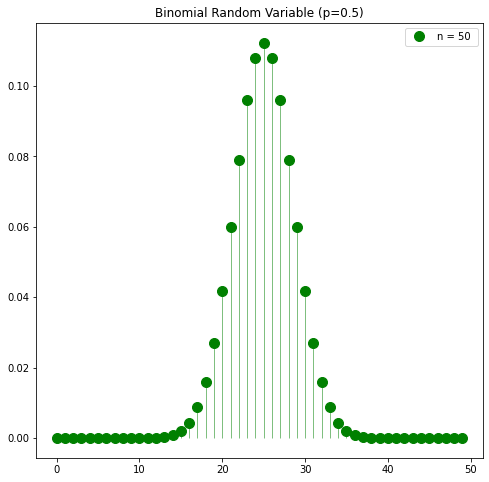

Mean : 25.00 , Variance : 12.50 


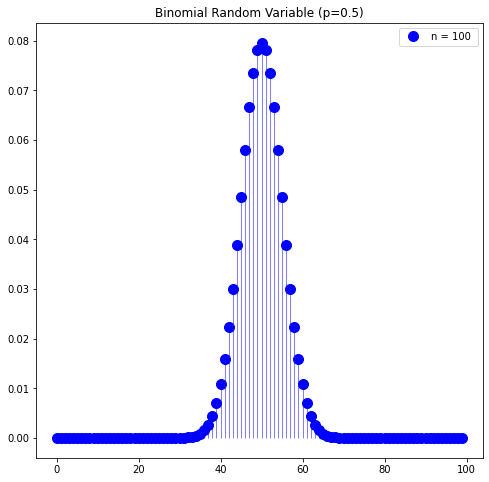

Mean : 50.00 , Variance : 25.00 


In [ ]:
# DO NOT EDIT
# Generate Binomial Random Variable Object
def generate_binomial_rv(P: list , N : list):
  """
  P : Diffrent values for probability of Success
  N : Diffrent values of n
  """
  colors = ['r','g','b']
  for i in range(len(P)):
    j = i%3
    p = P[i]
    # p is the probability of a single success.
    n = 60 # Keep n fixed and vary p
    rv = stats.binom(n,p) # Create Binomial Random Variable
    mean, var = rv.stats(moments='mv') # Compute Mean and Variance
    x = np.arange(n)
    f = rv.pmf(x)
    # Plot PMF
    # ms: size of o
    plt.figure(figsize=(8,8))
    plt.plot(x, f, colors[j]+'o', ms=10);
    # alpha: transparency of the line
    # lw: line width
    # Plot VLINES
    plt.vlines(x, 0, f, colors=colors[j], lw=1, alpha=0.5)
    plt.legend(labels = ["p = {v} ".format(v=p)])
    plt.title("Binomial Random Variable (n=60)")
    plt.show()
    print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean,v=var))

  for i in range(len(N)):
    n  = N[i]
    # p is the probability of a single success.
    p = 0.5 # Keep p fixed and vary n 
    rv = stats.binom(n,p=0.5) # Create Binomial Random Variable
    mean, var = rv.stats(moments='mv') # Compute Mean and Variance
    x = np.arange(n)
    f = rv.pmf(x)
    # Plot PMF
    # ms: size of o
    plt.figure(figsize=(8,8))
    plt.plot(x, f, colors[i]+'o', ms=10);
    # alpha: transparency of the line
    # lw: line width
    # Plot VLINES
    plt.vlines(x, 0, f, colors=colors[i], lw=1, alpha=0.5)
    plt.legend(labels = ["n = {n1} ".format(n1=n)])
    plt.title("Binomial Random Variable (p=0.5)")
    plt.show()
    print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean,v=var))
# generate_binomial_rv([0.1,0.5,0.9],[5,50,100])
generate_binomial_rv([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], [5, 50, 100])

**Write your answer (Binomial RV)** \\
By keeping the probability constant and varying n, the mean and variance are scaled by the same magnitude which n is changed. \\
Keeping n constant and varying the probability, the mean increases with increasing the probability whereas the variance projects a bell curve, peaking at 0.5 probability. \\
As for the distribution, in all cases it maps a bell curve, with increasing n and keeping probability constant, the curve becomes steeper, and keeping n constant and changing the probability shifts the bell curve along the x axis.

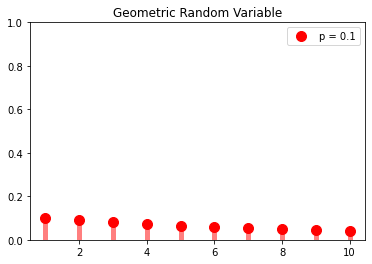

Mean : 10.00 , Variance : 90.00 


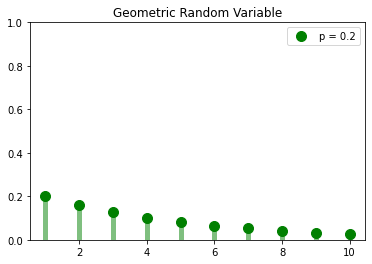

Mean : 5.00 , Variance : 20.00 


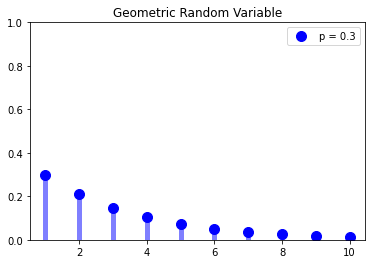

Mean : 3.33 , Variance : 7.78 


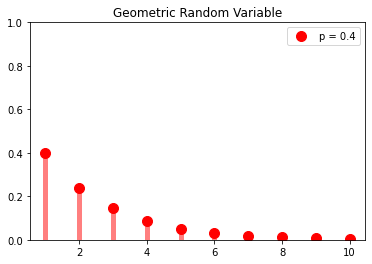

Mean : 2.50 , Variance : 3.75 


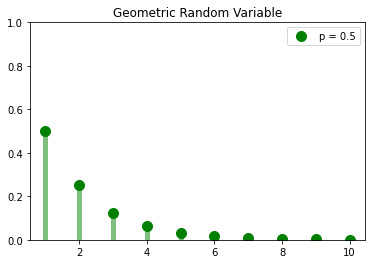

Mean : 2.00 , Variance : 2.00 


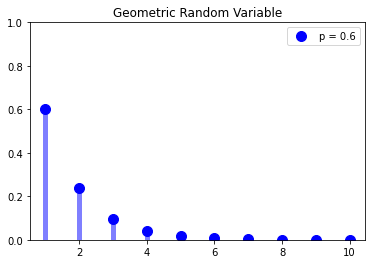

Mean : 1.67 , Variance : 1.11 


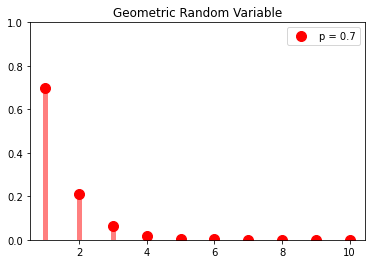

Mean : 1.43 , Variance : 0.61 


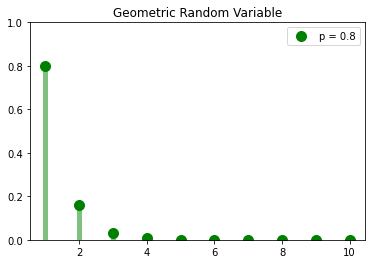

Mean : 1.25 , Variance : 0.31 


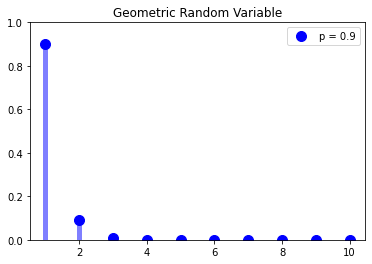

Mean : 1.11 , Variance : 0.12 


In [ ]:
# DO NOT EDIT
# Generate Geometric Random Variable Object
def generate_geometric_rv(P: list):
  """
  P : Diffrent values for probability of success
  """
  colors = ['r','g','b']
  for i in range(len(P)):
    j = i%3
    p = P[i]
    # p is the probability of a single success.
    rv = stats.geom(p) # Create Geometric Random Variable
    mean, var = rv.stats(moments='mv') # Compute Mean and Variance
    x = np.arange(1,11)
    f = rv.pmf(x)
    # Plot PMF
    # ms: size of o
    plt.plot(x, f, colors[j]+'o', ms=10);
    # alpha: transparency of the line
    # lw: line width
    # Plot VLINES
    plt.vlines(x, 0, f, colors=colors[j], lw=5, alpha=0.5)
    plt.ylim (0,1)
    plt.legend(labels = ["p = {v}".format(v=p)])
    plt.title("Geometric Random Variable")
    plt.show()
    print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean,v=var))

# generate_geometric_rv([0.25,0.5,0.9])
generate_geometric_rv([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

**Write your answer (Geometric RV)** \\
The mean and variance both peak at the lowest probability and decrease with the increase in probability. \\
The distribution projects a curve which gets steeper with increasing probabilities.

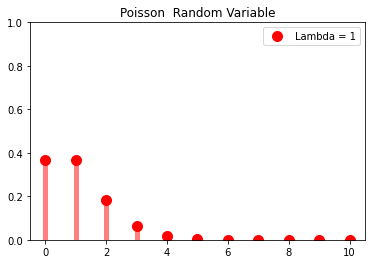

Mean : 1.00 , Variance : 1.00 


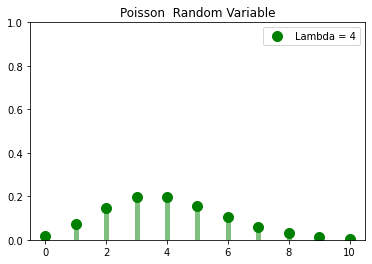

Mean : 4.00 , Variance : 4.00 


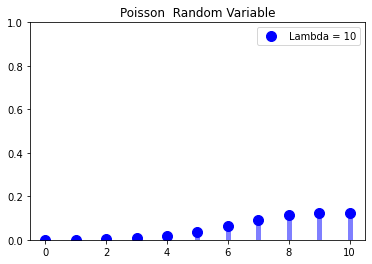

Mean : 10.00 , Variance : 10.00 


In [ ]:
# DO NOT EDIT
# Generate Poisson Random Variable Object
def generate_poisson_rv(Lambda: list):
  """
  Lambda : Diffrent lambda for probability of success
  """
  colors = ['r','g','b']
  for i in range(len(Lambda)):
    lambd = Lambda[i]
    # lambda is the Poisson Rate
    rv = stats.poisson(lambd) # Create Poisson Random Variable
    mean, var = rv.stats(moments='mv') # Compute Mean and Variance
    x = np.arange(11)
    f = rv.pmf(x)
    # Plot PMF
    # ms: size of o
    plt.plot(x, f, colors[i]+'o', ms=10);
    # alpha: transparency of the line
    # lw: line width
    # Plot VLINES
    plt.vlines(x, 0, f, colors=colors[i], lw=5, alpha=0.5)
    plt.ylim (0,1)
    plt.legend(labels = ["Lambda = {v}".format(v=lambd)])
    plt.title("Poisson  Random Variable")
    plt.show()
    print("Mean : {m:.2f} , Variance : {v:.2f} ".format(m=mean,v=var))

generate_poisson_rv([1,4,10])
# generate_poisson_rv([1, 10, 100])

**Write your answer here (Poisson RV)** \\
The mean and variance change alongside lambda, having the same value as lambda. \\
On a fixed range, the distribution peaks at the value of lambda and the value before it. It correspondingly decreases as we move along the x axis. 

### [20 Marks] Task 5: Birthday Paradox ###



One of the benefits of using code to compute probability is that the time-consuming calculations can be skipped. This can be seen by the Birthday's Paradox Problem.

**Problem Statement**: Given there are $n$ students in the class, assuming that none are not born in a leap year, find the probability that at least 2 people share a birthday.

For $0<=n<=366$
$$P(\mbox{none share}) = ∏_{k=1}^{k=n} \frac{365-k+1}{365}$$
Let the empty product be 1.
Therefore the desired probability can be computed for $0<=n<=366$
$$P(\mbox{at least 2 people share}) = 1- ∏_{k=1}^{k=n} \frac{365-k+1}{365}$$

The following is a simple code snippet to show how it can be plotted in Python.



In [ ]:
# DO NOT EDIT
def birthday_paradox(n):
  number_of_students = []
  probabilities = []
  product = 1
  for k in range(1,n+1):
    product*= (365-k+1)/365
    number_of_students.append(k)
    probabilities.append(1-product)
  return number_of_students, probabilities

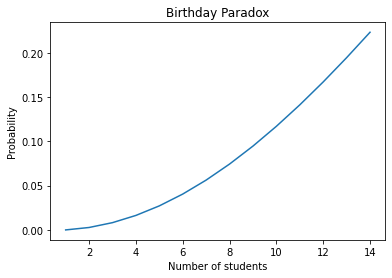

In [ ]:
x,y = birthday_paradox(14)
#Task 1
plt.plot(x,y)
# plt.vlines(x, 0, y, "r", lw=5, alpha=0.5)
plt.title("Birthday Paradox")
plt.xlabel("Number of students")
plt.ylabel("Probability")
plt.show()


**Tasks:**
1. The graph is incomplete. It doesn't have any labels, add the labels and feel free to make it aesthetic.

2. When solving any problems regarding probability, we should be vary of our assumptions. In this problem, we made two assumptions (which is not stated) for computing the probability. State those assumptions. (Hint for one of the assumptions: Our logic breaks in the case of twins)

3. If $n=400$, $k=380$, in the product will give us a negative value. Does it mean that this algorithm will fail for $k-380$?. See whether it does. If it does, then fix the error in the code. If it doesn't state why and whether the computation for $k\geq 367$ is representative of something or not, if it isn't update the code to reflect this? 

  After making the respective changes, draw the graph for $n=500$

**Write answer of 2 here.** \\
1.   We are assuming that there are no twins in the class, as it would disrupt our algorithm.
2.   The number of students in the class are $\leq 365$; which is the number of days in a non leap year. 



In [ ]:
# TASK 3
def birthday_paradox_new(n):
  number_of_students = []
  probabilities = []
  product = 1
  for k in range(1,n+1):
    if k <= 365:
      product*= (365-k+1)/(365)
    number_of_students.append(k)
    probabilities.append(1-product)

  return number_of_students, probabilities

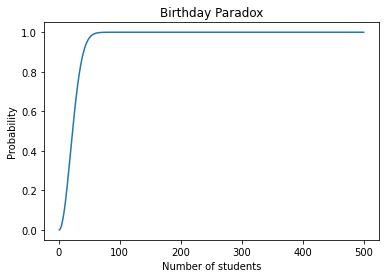

In [ ]:
x,y = birthday_paradox(500)
# plt.plot(x, y)
#Task 3
plt.plot(x,y)
# plt.vlines(x, 0, y, "r", lw=5, alpha=0.5)
plt.title("Birthday Paradox")
plt.xlabel("Number of students")
plt.ylabel("Probability")
plt.show()

**Write answer of 3 here.** \\
Although our graph indicates that the probabilities for values of $n \geq 366$ are 1 which are correct. However, the value calculated through the formula $\dfrac{365-k+1}{365}$ is negative which is incorrect as probabilities cannot be negative but since negative values multiplied together yield positive product so our algorithm holds but it is flawed. So as we already know the probability will remain 1 for values of $n \geq 366$, we stop updating the probability in the updated code.


# Part 2 : Ungraded

**This is an ungraded question. Feel free to solve this problem. There are no bonus marks for attempting this task.**

### [0 Marks] Task 6: Simulating the entire sample place

In the above scenario, we saw that if we know the formula for computing the probability, we can easily code it. This is useful in some situations, but this is not the only thing that can be done to make our lives easier. We can compute the entire sample space for combinatorial problems (of reasonable size).

As an illustration, we can use it on a friendship graph. Suppose that we know that 3 of the links have broken apart and each of the 

For example take the case of a network.


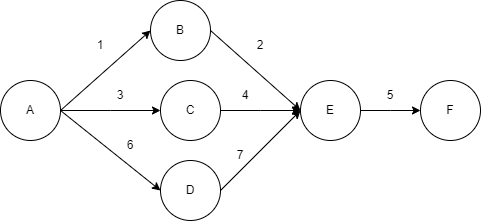

Given a network of nodes and edges, if 3 connections break what is the probability that a signal can go from A to F.

One thing we can do is generate all the possible combinations of lines that can be broken and assuming that each of the possible combination is equally likely compute which ones allow us to send the signal.

This problem can be phrased in a different way: find the probability that there is still a path from you to the instructor.

We can see from the diagram, that there are 3 paths from A to F

1. 1,2,5
2. 3,4,5
3. 6,7,5

If any of this path exists in the graph, then the element in our sample space is valid.

The following code does this computation and prints the desired probability.

Note: We can probably implement Breadth First Search or Depth First Search to solve this problem. That would require us to store the vertices of the graph as well. That approach is better, since that can work on any arbitrary graph but for the purposes of illustrating the concept, this is the simpler approach.

**Task:** If you want, try making this problem work any arbitrary graph.


In [ ]:
from itertools import combinations

edges = [1,2,3,4,5,6,7]
edges_initial = set([1,2,3,4,5,6,7])
path_1 = set([1,2,5])
path_2 = set([3,4,5])
path_3 = set([6,7,5])
valid = 0 
total = 0
for remove_edges in combinations(edges,3):
  new = edges_initial - set(remove_edges)
  valid += path_1.issubset(new) or path_2.issubset(new) or path_3.issubset(new)
  total+=1

print(f"{valid}/{total}")